# Probability and Statistics Case Study
<h2> on National Health And Nutrition Examination Survey (NHANES) Data </h2>

In this case study, you will perform statistical inference on National Health And Nutrition Examination Survey (NHANES) data.

In [1]:
#Import the required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
import scipy
import math

In [2]:
df = pd.read_csv('Health And Nutrition Data.csv')

In [3]:
df.shape

(5735, 28)

In [4]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


##### Task 1 – Visual display of distribution of body mass index values of male and female samples. Seemingly they are forming a near normal curve.

###### BMXWT : Body Weight

###### RIAGENDR : Gender

(<Axes: >, <Axes: >)

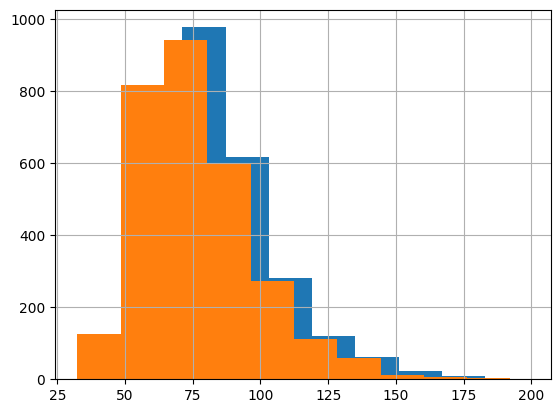

In [5]:
df[df['RIAGENDR'] == 1]['BMXWT'].hist(), df[df['RIAGENDR'] == 2]['BMXWT'].hist()

##### Task 2 – The average values of weights for both gender categories.

In [6]:
print("The average values of Weight for Male is {} and Female is {}".format(df[df['RIAGENDR'] == 1]['BMXWT'].mean(), df[df['RIAGENDR'] == 2]['BMXWT'].mean()))

The average values of Weight for Male is 86.57326222876058 and Female is 76.51676280963693


In [7]:
df[df['RIAGENDR'] == 1]['BMXWT'].mean() - df[df['RIAGENDR'] == 2]['BMXWT'].mean()

10.056499419123654

##### But are they actually almost equal? Let's find out

In [8]:
str("There are ") + str(df.BMXWT.isnull().sum()) + str(" NAs present")

'There are 69 NAs present'

In [9]:
m = np.array(df[df['RIAGENDR'] == 1]['BMXWT'])
f = np.array(df[df['RIAGENDR'] == 2]['BMXWT'])

In [10]:
s, p = scipy.stats.ttest_ind(m, f, nan_policy = 'omit')

In [11]:
if(p < 0.05):
    print("Weights of two genders are statistically different!")
else:
    print("They are same.")

Weights of two genders are statistically different!


###### BMXBMI : Body Mass Index

###### Task 3 – Let's check if Weights are independet of BMI.

In [12]:
wt = df['BMXWT']
bmi = df['BMXBMI']

In [13]:
s, p = scipy.stats.ttest_ind(wt, bmi, nan_policy = 'omit')

In [14]:
if(p < 0.05):
    print("BMI and Weight are statistically different!")
else:
    print("They are same.")

BMI and Weight are statistically different!


##### Task 4 – Let's build a confidence interval for waist circumference data.

###### BMXWAIST : Waist Circumference (cm)

###### Looks like normal distribution

<Axes: >

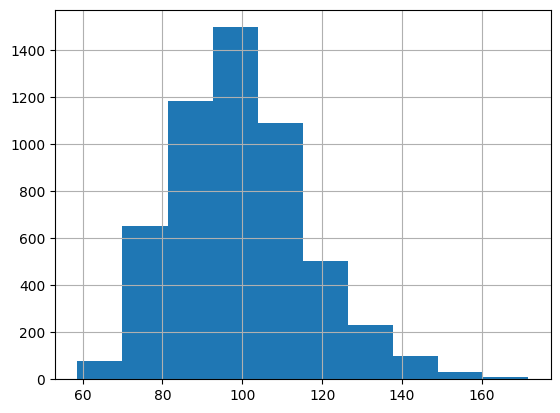

In [15]:
df['BMXWAIST'].hist()

###### Check if there are any missing values

In [16]:
df['BMXWAIST'].isnull().sum()

367

###### Remove NULLs 

In [17]:
waist_data = df['BMXWAIST'][pd.notnull(df['BMXWAIST'])]

In [18]:
max(waist_data), min(waist_data), (max(waist_data) - min(waist_data))

(171.6, 58.7, 112.89999999999999)

###### Calculate mean, standard deviation and size of sample

In [19]:
size = len(waist_data)
avg = waist_data.mean()
std = waist_data.std()

print(size, avg, std)

5368 99.56721311475411 16.844108549521394


###### Calculate the confidence interval with alpha of 5%

In [20]:
margin = stats.norm.ppf(0.95) * (std/math.sqrt(size))
conf_interval = (avg - margin, avg + margin)
print(conf_interval)

(99.18905882207766, 99.94536740743057)


###### Task 5 – Ages of survey respondent were recorded. Demonstrate the distribution of age and apply the Central Limit Theorem on it so that it can conform with Normal Distribution.

###### RIDAGEYR : Age in years at screening

In [21]:
df['RIDAGEYR'].isnull().sum()

0

In [22]:
data = df['RIDAGEYR'][pd.notnull(df['RIDAGEYR'])]

<Axes: >

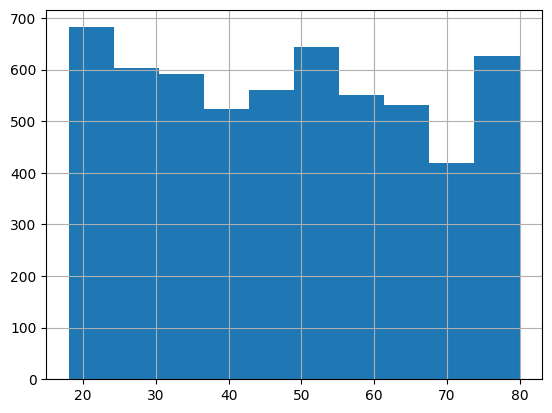

In [23]:
data.hist()

In [24]:
data.mean()

48.05231037489102

In [25]:
data = pd.DataFrame(data)

In [26]:
sampled_means = []

# For 100  times,
for i in range(0,100):
    # Take a random sample of 20 rows from the population, take the mean of those rows, append to sampled_means
    sampled_means.append(data.sample(n=20).mean().values[0])

<Axes: >

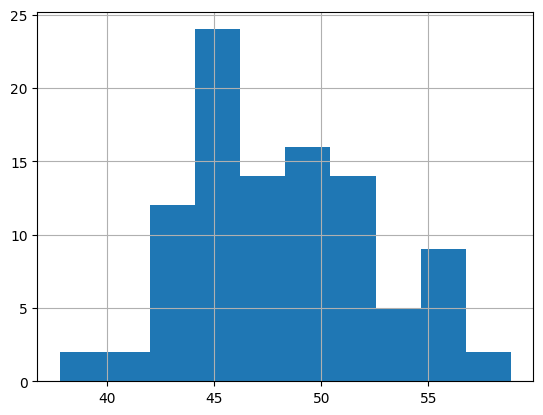

In [27]:
pd.Series(sampled_means).hist()

###### RIDRETH1 : Race-ethnicity 
###### DMDHHSIZ: Number of people in the participant’s household

###### Task 6 – Are these two features independent ?

In [28]:
df['DMDHHSIZ'].nunique(), df['RIDRETH1'].nunique()

(7, 5)

In [29]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
obs = np.array(df['SDMVPSU'], df['RIDRETH1'])
stat, p, dof, expected = chi2_contingency(obs)

In [30]:
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Independent (fail to reject H0)
